# Sentimental Analysis on Missing and Murdered Indigenous Women/ People using Big Data Analytics

# Libraries

In [1]:
import json
import pandas as pd
import csv
import re
from textblob import TextBlob
import string
import preprocessor as p
import os
import time
from operator import itemgetter 
import glob

In [27]:
f = open('output.json', encoding="utf8")
data = json.load(f)

In [29]:
data[0]

{'data': [{'lang': 'en',
   'id': '585591342270676992',
   'reply_settings': 'everyone',
   'source': 'Twitter for iPhone',
   'text': 'All the energy spent on LCE could have gone towards working on community strategies for #MMIW, celebrating amazing people or self care.',
   'public_metrics': {'retweet_count': 3,
    'reply_count': 0,
    'like_count': 8,
    'quote_count': 0},
   'entities': {'hashtags': [{'start': 88, 'end': 93, 'tag': 'MMIW'}],
    'annotations': [{'start': 24,
      'end': 26,
      'probability': 0.5011,
      'type': 'Organization',
      'normalized_text': 'LCE'}]},
   'created_at': '2015-04-07T23:53:50.000Z',
   'author_id': '1004976080',
   'possibly_sensitive': False},
  {'lang': 'en',
   'id': '585588014337916928',
   'reply_settings': 'everyone',
   'source': 'Twitter Web Client',
   'text': '"Maybe u have to be a woman to understand how debasing this is. Really, u should only have 2b human." http://t.co/JjuR2hIoNs #MMIW #endVAW',
   'public_metrics': {'re

In [66]:
json_folder_path = os.path.basename("/2015to2020")
# In order to get the list of all files that ends with ".json"
# we will get list of all files, and take only the ones that ends with "json"
json_files = [ x for x in os.listdir(json_folder_path) if x.endswith("json") ]

i=0
for json_file in json_files:
    i = i+1
    json_file_path = os.path.join(json_folder_path, json_file)
    f = open(json_file_path, encoding="utf8")
    data = json.load(f)
    data_fields = data['data']
    places_fields = data['includes']['places']
    tweets_frame = pd.DataFrame()
    tweets_frame['id'] = list(map(lambda data_fields: data_fields['id'] if data_fields['id'] != None else None, data_fields))
    tweets_frame['text'] = list(map(lambda data_fields: data_fields['text'] if data_fields['text'] != None else None, data_fields))
    tweets_frame['created_at'] = list(map(lambda data_fields: data_fields['created_at'] if data_fields['created_at'] != None else None, data_fields))
    tweets_frame['source'] = list(map(lambda data_fields: data_fields['source'] if data_fields['source'] != None else None, data_fields))
    tweets_frame['geo'] = list(map(lambda data_fields: data_fields.get('geo') if data_fields.get('geo') != None else None, data_fields))
    
    tweets_frame['retweet_count'] = list(map(lambda data_fields: data_fields['public_metrics']['retweet_count'] if data_fields['public_metrics']['retweet_count'] != None else None, data_fields))
    tweets_frame['reply_count'] = list(map(lambda data_fields: data_fields['public_metrics']['reply_count'] if data_fields['public_metrics']['reply_count'] != None else None, data_fields))
    tweets_frame['like_count'] = list(map(lambda data_fields: data_fields['public_metrics']['like_count'] if data_fields['public_metrics']['like_count'] != None else None, data_fields))  
    #tweets_frame.to_csv('./tweet_df1/csv'+str(i)+'.csv',index=False)
    user_Loc_Frame = pd.DataFrame()
    user_Loc_Frame['full_name'] = list(map(lambda places_fields: places_fields['full_name'] if places_fields['full_name'] != None else None, places_fields))
    user_Loc_Frame['country'] = list(map(lambda places_fields: places_fields['country'] if places_fields['country'] != None else None, places_fields))
    user_Loc_Frame['country_code'] = list(map(lambda places_fields: places_fields['country_code'] if places_fields['country_code'] != None else None, places_fields))
    user_Loc_Frame['longitude'] = list(map(lambda places_fields: places_fields['geo']['bbox'][0] if places_fields['geo'] != None else None, places_fields))
    user_Loc_Frame['latitude'] = list(map(lambda places_fields: places_fields['geo']['bbox'][1] if places_fields['geo'] != None else None, places_fields))
    user_Loc_Frame.to_csv('./user_loc_df1/csv'+str(i)+'.csv',index=False)
    f.close()
    


In [2]:
#Creating a single dataframe
fileList=glob.glob("./tweet_df1/*.csv")
output_file = pd.concat([pd.read_csv(filename) for filename in fileList])
output_file.to_csv("Final_tweets1.csv", index=False)

In [3]:
#Creating a single dataframe
fileList=glob.glob("./user_loc_df1/*.csv")
output_file = pd.concat([pd.read_csv(filename) for filename in fileList])
output_file.to_csv("Final_userLocs1.csv", index=False)

### Generating the tweet and user data frames

In [5]:
# Now lets the country distribution of tweets. Before that we have to know, how many tweets has 
#their location setting on.
tweets_frame = pd.read_csv("./dataset/Final_tweets1.csv") 
user_loc_frame = pd.read_csv("./dataset/Final_userLocs1.csv")

In [6]:
user_loc_frame

,full_name,country,country_code,longitude,latitude
0,"Wood Buffalo, Alberta",Canada,CA,-114.001159,55.329481
1,"Calgary, Alberta",Canada,CA,-114.316038,50.842780
2,"Vancouver, British Columbia",Canada,CA,-123.224215,49.198540
3,"Québec, Canada",Canada,CA,-71.548521,46.730765
4,"Ottawa, Ontario",Canada,CA,-76.353876,44.961937
...,...,...,...,...,...
4613,"Huron, Ontario",Canada,CA,-82.258847,43.236952
4614,"Iqaluit, Nunavut",Canada,CA,-68.616050,63.713148
4615,"Cape Breton, Nova Scotia",Canada,CA,-60.812036,44.588424
4616,"Toronto, Ontario",Canada,CA,-79.639319,43.403221


In [7]:
tweets_frame

,id,text,created_at,source,geo,retweet_count,reply_count,like_count
0,585591342270676992,All the energy spent on LCE could have gone to...,2015-04-07T23:53:50.000Z,Twitter for iPhone,NaN,3,0,8
1,585588014337916928,"""Maybe u have to be a woman to understand how ...",2015-04-07T23:40:36.000Z,Twitter Web Client,NaN,0,0,0
2,585582937707524097,The thing that disgusts me most about this who...,2015-04-07T23:20:26.000Z,Twitter for iPhone,NaN,5,0,7
3,585577924348268546,"""This week, CBC News will launch a nationwide ...",2015-04-07T23:00:31.000Z,Twitter for iPhone,"{'place_id': '0a17baca7eb1caad', 'coordinates'...",0,0,1
4,585571880582696963,The red fabric starts to go on. This is where ...,2015-04-07T22:36:30.000Z,iOS,NaN,5,0,2
...,...,...,...,...,...,...,...,...
173221,793637613085351937,It's over. @MapleLeafs win in overtime. Meegwe...,2016-11-02T02:15:26.000Z,Twitter for iPhone,NaN,15,1,44
173222,793635642290745344,This is why the #MMIW inquiry without investig...,2016-11-02T02:07:36.000Z,Facebook,NaN,2,0,3
173223,793634268610228225,The #IdleNoMore &amp; #MMIW eDaily — https://t...,2016-11-02T02:02:09.000Z,Paper.li,NaN,0,0,1
173224,793630443379707904,"Oh RCMP ""dealt with the complaint"" did they?! ...",2016-11-02T01:46:57.000Z,Twitter for Android,NaN,1,0,1


In [8]:
tweets_frame['date'] = ''

In [11]:
tweets_frame['date']= [x[:10] for x in tweets_frame['created_at']]

In [14]:
tweets_frame

,id,text,created_at,source,geo,retweet_count,reply_count,like_count,date
0,585591342270676992,All the energy spent on LCE could have gone to...,2015-04-07T23:53:50.000Z,Twitter for iPhone,NaN,3,0,8,2015-04-07
1,585588014337916928,"""Maybe u have to be a woman to understand how ...",2015-04-07T23:40:36.000Z,Twitter Web Client,NaN,0,0,0,2015-04-07
2,585582937707524097,The thing that disgusts me most about this who...,2015-04-07T23:20:26.000Z,Twitter for iPhone,NaN,5,0,7,2015-04-07
3,585577924348268546,"""This week, CBC News will launch a nationwide ...",2015-04-07T23:00:31.000Z,Twitter for iPhone,"{'place_id': '0a17baca7eb1caad', 'coordinates'...",0,0,1,2015-04-07
4,585571880582696963,The red fabric starts to go on. This is where ...,2015-04-07T22:36:30.000Z,iOS,NaN,5,0,2,2015-04-07
...,...,...,...,...,...,...,...,...,...
173221,793637613085351937,It's over. @MapleLeafs win in overtime. Meegwe...,2016-11-02T02:15:26.000Z,Twitter for iPhone,NaN,15,1,44,2016-11-02
173222,793635642290745344,This is why the #MMIW inquiry without investig...,2016-11-02T02:07:36.000Z,Facebook,NaN,2,0,3,2016-11-02
173223,793634268610228225,The #IdleNoMore &amp; #MMIW eDaily — https://t...,2016-11-02T02:02:09.000Z,Paper.li,NaN,0,0,1,2016-11-02
173224,793630443379707904,"Oh RCMP ""dealt with the complaint"" did they?! ...",2016-11-02T01:46:57.000Z,Twitter for Android,NaN,1,0,1,2016-11-02


In [30]:
tweets_frame.isnull().sum().max()

165688

<AxesSubplot:>

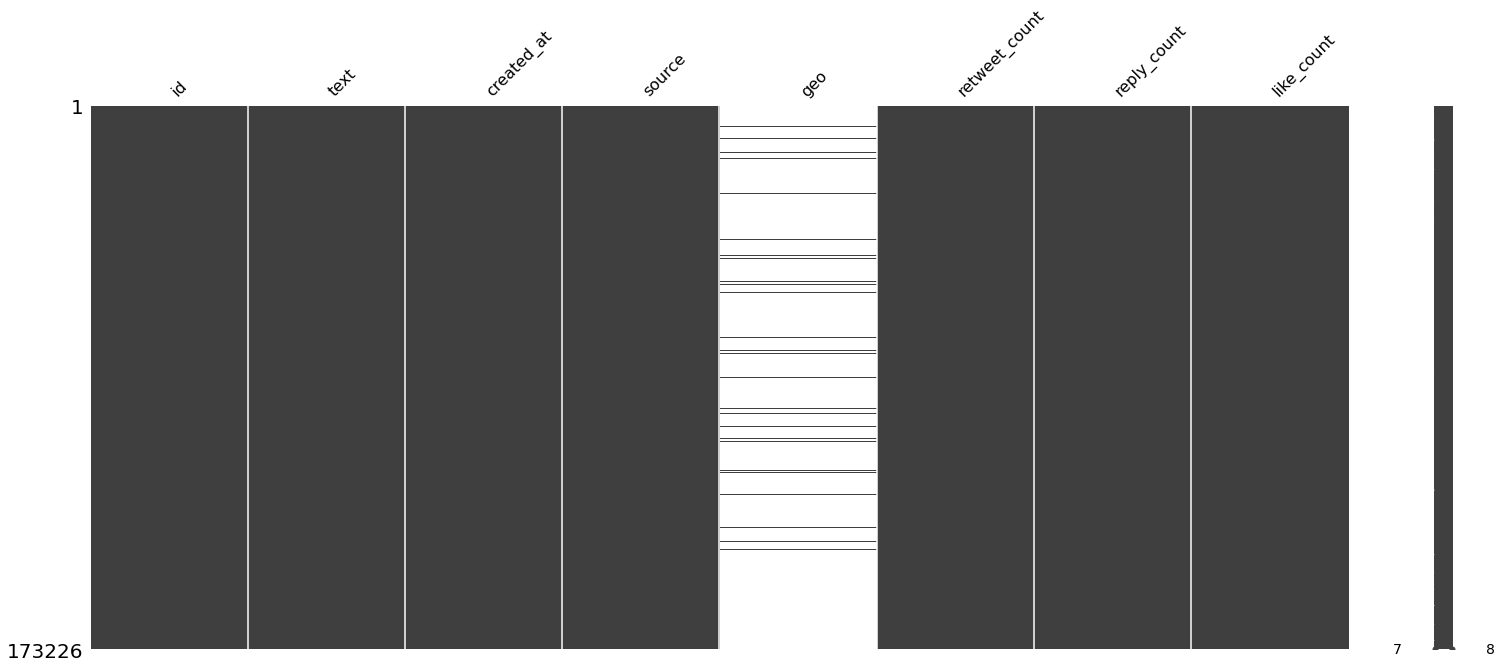

In [32]:
import missingno as msno
%matplotlib inline
msno.matrix(tweets_frame)

<AxesSubplot:>

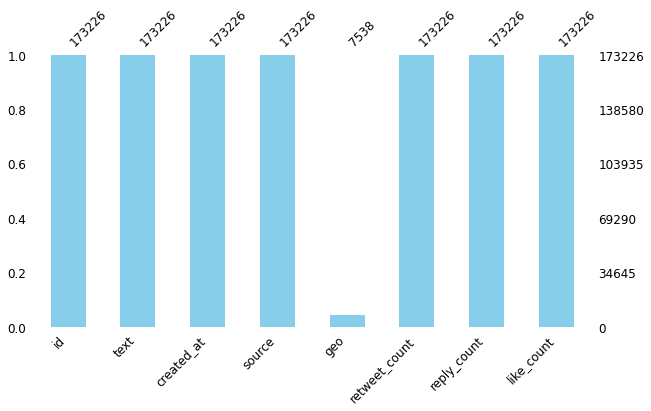

In [36]:
msno.bar(tweets_frame, color="skyblue", figsize=(10,5), fontsize=12)

A dip in geo location data is understandable since several users choose to disable their location while tweeting, so this column is of less significance in tweet analysis. However, Location is given by user while creating twitter account and hence user data frame has location data without missingness.

## Geographic Distribution of users who tweet about MMIW/P in english across the world.

### We can observe most of the users are from Canada and USA

In [13]:

%%html
<script type='text/javascript' src='https://prod-useast-b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1356px; height: 871px;'><object class='tableauViz' width='1356' height='871' style='display:none;'><param name='host_url' value='https%3A%2F%2Fprod-useast-b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableauviz' /><param name='name' value='User_Distribution&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>


In [3]:
%%html
<script type='text/javascript' src='https://10ay.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1280px; height: 524px;'><object class='tableauViz' width='1280' height='524' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ay.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableau5900' /><param name='name' value='user_Locations&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

### Country distribution of users who tweet about MMIW/P in english.

In [ ]:
'''
%%html
<script type='text/javascript' src='https://prod-useast-b.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1361px; height: 871px;'><object class='tableauViz' width='1361' height='871' style='display:none;'><param name='host_url' value='https%3A%2F%2Fprod-useast-b.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableauviz' /><param name='name' value='Country_DistributionOfUsers&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>
'''

In [5]:
%%html
<script type='text/javascript' src='https://10ay.online.tableau.com/javascripts/api/viz_v1.js'></script><div class='tableauPlaceholder' style='width: 1000px; height: 827px;'><object class='tableauViz' width='1000' height='827' style='display:none;'><param name='host_url' value='https%3A%2F%2F10ay.online.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='&#47;t&#47;tableau5900' /><param name='name' value='user_Locations&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='showAppBanner' value='false' /></object></div>

### Tweets with location on

In [16]:
#tweets that are location enabled.
tweet_location = tweets_frame[['date', 'text', 'geo']].copy()

In [17]:
tweet_location.dropna(axis = 0, how='any', inplace=True)
tweet_location

,date,text,geo
3,2015-04-07,"""This week, CBC News will launch a nationwide ...","{'place_id': '0a17baca7eb1caad', 'coordinates'..."
15,2015-04-07,#Aboriginal teen fighting for her life after a...,"{'place_id': '53504716d445dcad', 'coordinates'..."
109,2015-04-06,"""Court's use of remains did not respect #Cindy...",{'place_id': '1e5cb4d0509db554'}
172,2015-04-06,Harper failed for Cindy Gladue ! #MMIW #Justi...,"{'place_id': '23b629b33fba1676', 'coordinates'..."
204,2015-04-05,Just read an anti-sex work article conflating ...,"{'place_id': '38d5974e82ed1a6c', 'coordinates'..."
...,...,...,...
173152,2016-11-03,Good #PublicPolicy Should Be Built on All Avai...,{'place_id': '3797791ff9c0e4c6'}
173154,2016-11-03,Dcision to exclude #murdered or missing #Indig...,{'place_id': '3797791ff9c0e4c6'}
173156,2016-11-03,Indigenous orgs across Canada have joined our ...,{'place_id': '3797791ff9c0e4c6'}
173161,2016-11-03,.@TheCurrentCBC Your guest Connie Greyeyes is ...,{'place_id': '3797791ff9c0e4c6'}


### Word Cloud of tweets

In [18]:
tweets_frame['text_new'] = ''

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_tweets(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("MMIWG")
    stopwords.add("t")
    stopwords.add("co")
    stopwords.add("Women")
    stopwords.add("indigenous")
    stopwords.add("MMIW")
    stopwords.add("missing")
    stopwords.add("murdered")
    stopwords.add("HTTPS")
    stopwords.add("CANADA")
    stopwords.add("WILL")
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = None).generate(" ".join([i for i in tweets_frame['text'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Missing and Murdered Indigenoud Women")

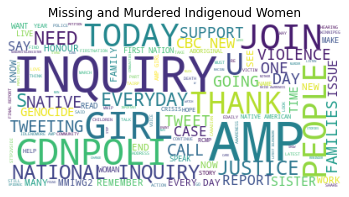

In [56]:
wordcloud_by_tweets(tweets_frame)  

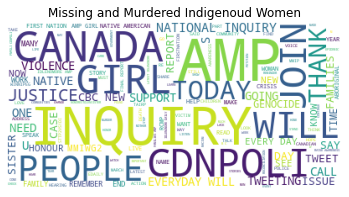

In [37]:
wordcloud_by_tweets(tweets_frame)  

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_by_source(tweets):
    stopwords = set(STOPWORDS)
    #stopwords.add("Twitter")
    stopwords.add("client")

    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets_frame['source'].str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("MMIWP Source of tweets word cloud")

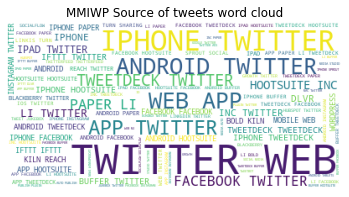

In [54]:
wordcloud_by_source(tweets_frame)  

In [23]:
# Function For comparison
def word_occurance(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

### Key Words that are of our interest

This gives us insight with respect to what keyword people most use. Also we can understand to how often people are tweeting about Police, Law enforcements etc.

In [57]:
# Keywords of Interest
keywords = ['Police','court','law','exploitation','arrest','trial','hearings','criminal','abuse','legislation']

In [60]:
counts = {}
counts['police'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('police', tweet))])
counts['court'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('court', tweet))])
counts['law'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('law', tweet))])
counts['exploitation'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('exploitation', tweet))])
counts['arrest'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('arrest', tweet))])
counts['trial'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('trial', tweet))])
counts['hearings'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('hearings', tweet))])
counts['abuse'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('abuse', tweet))])
counts['legislation'] = len(tweets_frame[tweets_frame['text'].apply(lambda tweet: word_occurance('legislation', tweet))])

In [62]:
counts

{'police': 6055,
 'court': 1640,
 'law': 3274,
 'exploitation': 312,
 'arrest': 397,
 'trial': 388,
 'hearings': 2521,
 'abuse': 1556,
 'legislation': 373}

The keyword police has occured more often in tweets

In [27]:
print(max(counts.items(), key = lambda k : k[1]))
print(min(counts.items(), key = lambda k : k[1]))

('police', 6055)
('exploitation', 312)


## Data Modeling

In [28]:
# Observing All tweets associated with each all keywords
def Keyword_tweet(tweet, keywords = ['Police','court','law','exploitation','arrest','trial','hearings','criminal','abuse']):
    tweet = tweet.lower()
    for x in keywords:
        match = re.search(x.lower(),tweet)
        if match:
            return x
    return None

# Adding new column as company
tweets_frame['keyword'] = tweets_frame['text'].apply(lambda x: Keyword_tweet(x))

In [29]:
tweets_frame.groupby('keyword').keyword.count()

keyword
Police          6055
abuse           1306
arrest           296
court           1585
criminal         312
exploitation     297
hearings        2430
law             3031
trial            321
Name: keyword, dtype: int64

In [30]:
def cleanUpTweet(txt):
    # Removes mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Removes hashtags
    txt = re.sub(r'#', '', txt)
    # Removes retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Removes urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [49]:
tweets_frame['text_new'] = tweets_frame['text'].apply(cleanUpTweet)

In [50]:
tweets_frame1 = pd.DataFrame()
tweets_frame1 = tweets_frame

In [63]:
tweets_frame1['text_new']

0         All the energy spent on LCE could have gone to...
1         "Maybe u have to be a woman to understand how ...
2         The thing that disgusts me most about this who...
3         "This week, CBC News will launch a nationwide ...
4         The red fabric starts to go on. This is where ...
                                ...                        
173221    It's over.  win in overtime. Meegwetch for the...
173222    This is why the MMIW inquiry without investiga...
173223    The IdleNoMore &amp; MMIW eDaily —  || FNPoli ...
173224    Oh RCMP "dealt with the complaint" did they?! ...
173225    Ss in my CHV2O class are learning to analyze a...
Name: text_new, Length: 173226, dtype: object

In [38]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [96]:
tweets_frame1['Subjectivity'] = tweets_frame1['text_new'].apply(getTextSubjectivity)
tweets_frame1['Polarity'] = tweets_frame1['text_new'].apply(getTextPolarity)

In [121]:
tweet_polarity = tweets_frame1[["text_new", "Subjectivity","Polarity"]]
tweet_polarity.head(100)

,text_new,Subjectivity,Polarity
0,All the energy spent on LCE could have gone to...,0.500000,0.250000
1,"""Maybe u have to be a woman to understand how ...",0.433333,0.066667
2,The thing that disgusts me most about this who...,0.500000,0.100000
3,"""This week, CBC News will launch a nationwide ...",0.571429,0.357143
4,The red fabric starts to go on. This is where ...,0.000000,0.000000
...,...,...,...
95,There are more than 1186 Missing &amp; Murdere...,0.275000,0.150000
96,LTs have been stated many times so FreeTenhari...,0.250000,0.250000
97,Racist FreeTenharim @ personalescrito could no...,0.000000,0.000000
98,"""Rape is a crime where the after-effects of PT...",0.333333,-0.350000


In [115]:
# negative, nautral, positive analysis
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [116]:
tweet_polarity['Score'] = tweet_polarity['Polarity'].apply(getTextAnalysis)
tweet_polarity.head(10)

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text_new,Subjectivity,Polarity,Score
0,All the energy spent on LCE could have gone to...,0.500000,0.250000,Positive
1,"""Maybe u have to be a woman to understand how ...",0.433333,0.066667,Positive
2,The thing that disgusts me most about this who...,0.500000,0.100000,Positive
3,"""This week, CBC News will launch a nationwide ...",0.571429,0.357143,Positive
4,The red fabric starts to go on. This is where ...,0.000000,0.000000,Neutral
5,"a ww who worked for a now defunct ""consulting""...",0.066667,0.000000,Neutral
6,After a brutal assault in Manitoba foster care...,0.500000,-0.437500,Negative
7,Theland Kicknosway's 134 km walk/run for child...,0.050000,-0.200000,Negative
8,Theland Kicknosway's 134 km walk/run for child...,0.050000,-0.200000,Negative
9,Theland Kicknosway's 134 km walk/run for child...,0.050000,-0.200000,Negative


<BarContainer object of 3 artists>

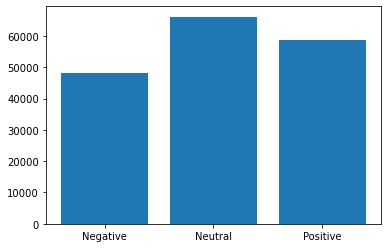

In [46]:
labels = tweet_polarity.groupby('Score').count().index.values
values = tweet_polarity.groupby('Score').size().values

plt.bar(labels, values)

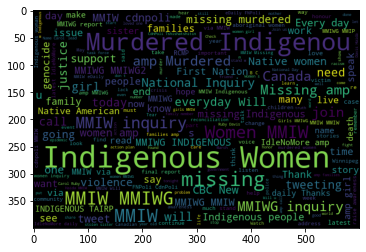

In [47]:
words = ' '.join([tweet for tweet in tweet_polarity['text_new']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

In [65]:
positive_tweets = tweet_polarity[tweet_polarity['Score'] == 'Positive']

In [67]:
positive_tweets.head(10)

,text_new,Subjectivity,Polarity,Score
0,All the energy spent on LCE could have gone to...,0.500000,0.250000,Positive
1,"""Maybe u have to be a woman to understand how ...",0.433333,0.066667,Positive
2,The thing that disgusts me most about this who...,0.500000,0.100000,Positive
3,"""This week, CBC News will launch a nationwide ...",0.571429,0.357143,Positive
34,This is important perspective on the role men ...,1.000000,0.400000,Positive
38,The wind blew gently making trees dance by the...,0.800000,0.200000,Positive
44,So pleased to hear is doing a series on MMIW ...,1.000000,0.500000,Positive
45,"""We were given that right to live &amp; they a...",0.523810,0.093074,Positive
61,Where are the men? The stunning silence around...,0.525000,0.150000,Positive
63,This man is stepping up in the fight against M...,0.200000,0.025000,Positive


In [68]:
from sklearn.cluster import MiniBatchKMeans, DBSCAN

In [82]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shehn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [91]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shehn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [111]:
tweet_polarity1 = pd.DataFrame()
tweet_polarity1 = tweet_polarity

In [123]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = stopwords.words('english')

#add punctuation char's to stopwords list
stop_words += list(string.punctuation) # <-- contains !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

#add integers and other stuff
stop_words += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','-','”','\'s','n\'t','“','...']

In [129]:
tweet_polarity['text_new']

0         All the energy spent on LCE could have gone to...
1         "Maybe u have to be a woman to understand how ...
2         The thing that disgusts me most about this who...
3         "This week, CBC News will launch a nationwide ...
4         The red fabric starts to go on. This is where ...
                                ...                        
173221    It's over.  win in overtime. Meegwetch for the...
173222    This is why the MMIW inquiry without investiga...
173223    The IdleNoMore &amp; MMIW eDaily —  || FNPoli ...
173224    Oh RCMP "dealt with the complaint" did they?! ...
173225    Ss in my CHV2O class are learning to analyze a...
Name: text_new, Length: 173226, dtype: object

In [131]:
def tokenize_lowercase(text):
    tokens = word_tokenize(text)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stop_words]
    return stopwords_removed
  
tweet_polarity['tokenize_tweet'] = tweet_polarity['text_new'].apply(tokenize_lowercase)

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [132]:
tweet_polarity['tokenize_tweet']

0         [energy, spent, lce, could, gone, towards, wor...
1         [``, maybe, u, woman, understand, debasing, re...
2         [thing, disgusts, whole, cluster, fuck, energy...
3         [``, week, cbc, news, launch, nationwide, spec...
4         [red, fabric, starts, go, vamps, placed, white...
                                ...                        
173221    ['s, win, overtime, meegwetch, beautiful, cere...
173222    [mmiw, inquiry, without, investigation, police...
173223    [idlenomore, amp, mmiw, edaily, —, ||, fnpoli,...
173224    [oh, rcmp, ``, dealt, complaint, '', charges, ...
173225    [ss, chv2o, class, learning, analyze, assess, ...
Name: tokenize_tweet, Length: 173226, dtype: object

In [133]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(tweet_text):
    lemmatized =[]
    for w in tweet_text:
        lemmatized.append(lemmatizer.lemmatize(w))
    return lemmatized

tweet_polarity['tweet_lemma'] = tweet_polarity['tokenize_tweet'].apply(lemmatize_text)

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [134]:
tweet_polarity['tweet_lemma']

0         [energy, spent, lce, could, gone, towards, wor...
1         [``, maybe, u, woman, understand, debasing, re...
2         [thing, disgust, whole, cluster, fuck, energy,...
3         [``, week, cbc, news, launch, nationwide, spec...
4         [red, fabric, start, go, vamp, placed, whiteho...
                                ...                        
173221    ['s, win, overtime, meegwetch, beautiful, cere...
173222    [mmiw, inquiry, without, investigation, police...
173223    [idlenomore, amp, mmiw, edaily, —, ||, fnpoli,...
173224    [oh, rcmp, ``, dealt, complaint, '', charge, l...
173225    [s, chv2o, class, learning, analyze, ass, gove...
Name: tweet_lemma, Length: 173226, dtype: object

In [137]:
from nltk.probability import FreqDist

#iterate through each tweet, then each token in each tweet, and store in one list
flat_words = [item for sublist in tweet_polarity[] for item in sublist]

word_freq = FreqDist(flat_words)

word_freq.most_common(50)

[('mmiw', 113433),
 ('mmiwg', 60786),
 ('woman', 57904),
 ('indigenous', 54370),
 ('missing', 38674),
 ('murdered', 32318),
 ('amp', 30208),
 ('inquiry', 29096),
 ("'s", 21777),
 ('’', 18027),
 ('cdnpoli', 14012),
 ('family', 13280),
 ('canada', 11478),
 ("''", 11141),
 ('girl', 10989),
 ('``', 10981),
 ('national', 10080),
 ('day', 10023),
 ('native', 9136),
 ('report', 8332),
 ('violence', 8243),
 ('via', 8238),
 ('people', 8221),
 ('join', 8056),
 ('...', 7917),
 ('today', 7863),
 ('say', 7703),
 ('u', 7556),
 ('justice', 7395),
 ('call', 7054),
 ('news', 6960),
 ("n't", 6797),
 ('one', 6557),
 ('need', 5848),
 ('police', 5662),
 ('support', 5498),
 ('please', 5286),
 ('cbc', 5257),
 ('sister', 5203),
 ('”', 5192),
 ('case', 5095),
 ('genocide', 4930),
 ('“', 4850),
 ('everyday', 4614),
 ('idlenomore', 4526),
 ('tweeting', 4515),
 ('thanks', 4505),
 ('year', 4495),
 ('awareness', 4465),
 ('community', 4458)]

In [138]:
#retrieve word and count from FreqDist tuples

most_common_count = [x[1] for x in word_freq.most_common(50)]
most_common_word = [x[0] for x in word_freq.most_common(50)]

#create dictionary mapping of word count
top_30_dictionary = dict(zip(most_common_word, most_common_count))

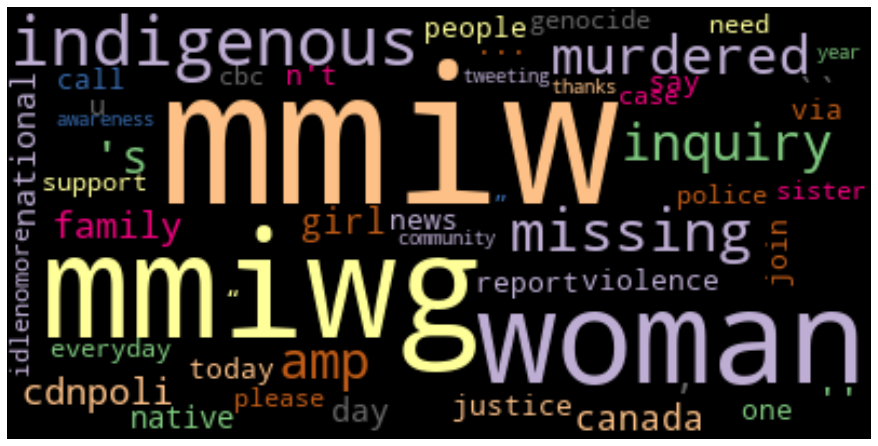

In [139]:
from wordcloud import WordCloud

#Create Word Cloud of top 30 words
wordcloud = WordCloud(colormap = 'Accent', background_color = 'black')\
.generate_from_frequencies(top_30_dictionary)

#plot with matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('top_50_cloud.png')

plt.show()

### Creating a Bag of words

In [142]:
import gensim

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [146]:
from gensim.corpora import Dictionary

#create dictionary
text_dict = Dictionary(tweet_polarity['tweet_lemma'])

#view integer mappings
text_dict.token2id

{'amazing': 0,
 'care': 1,
 'celebrating': 2,
 'community': 3,
 'could': 4,
 'energy': 5,
 'gone': 6,
 'lce': 7,
 'mmiw': 8,
 'people': 9,
 'self': 10,
 'spent': 11,
 'strategy': 12,
 'towards': 13,
 'working': 14,
 "''": 15,
 '2b': 16,
 '``': 17,
 'debasing': 18,
 'endvaw': 19,
 'human': 20,
 'maybe': 21,
 'really': 22,
 'u': 23,
 'understand': 24,
 'woman': 25,
 'amp': 26,
 'attention': 27,
 'cluster': 28,
 'disgust': 29,
 'fuck': 30,
 'thing': 31,
 'whole': 32,
 'cbc': 33,
 'launch': 34,
 'nationwide': 35,
 'news': 36,
 'series': 37,
 'special': 38,
 'week': 39,
 'fabric': 40,
 'go': 41,
 'placed': 42,
 'red': 43,
 'start': 44,
 'vamp': 45,
 'whitehorse': 46,
 'claiming': 47,
 'consulting': 48,
 'database': 49,
 'decade': 50,
 'defunct': 51,
 'last': 52,
 'org': 53,
 'ownership': 54,
 'police': 55,
 'w': 56,
 'work': 57,
 'worked': 58,
 'ww': 59,
 'aboriginal': 60,
 'assault': 61,
 'brutal': 62,
 'fighting': 63,
 'foster': 64,
 'life': 65,
 'manitoba': 66,
 'teen': 67,
 "'s": 68,
 '

In [147]:
tweets_bow = [text_dict.doc2bow(tweet) for tweet in tweet_polarity['tweet_lemma']]

## LDA Model

In [148]:
from gensim.models.ldamodel import LdaModel

k = 5
tweets_lda = LdaModel(tweets_bow,
                      num_topics = k,
                      id2word = text_dict,
                      random_state = 1,
                      passes=10)

tweets_lda.show_topics()

[(0,
  '0.091*"mmiw" + 0.016*"mmiwg" + 0.012*"\'s" + 0.010*"day" + 0.008*"please" + 0.008*"memorial" + 0.007*"family" + 0.007*"support" + 0.007*"elxn42" + 0.006*"reminder"'),
 (1,
  '0.057*"mmiw" + 0.033*"``" + 0.031*"\'\'" + 0.015*"\'s" + 0.014*"mmiwg" + 0.009*"today" + 0.009*"sister" + 0.008*"cbc" + 0.008*"..." + 0.007*"year"'),
 (2,
  '0.113*"woman" + 0.103*"indigenous" + 0.092*"mmiw" + 0.092*"missing" + 0.078*"murdered" + 0.059*"amp" + 0.021*"girl" + 0.015*"join" + 0.014*"cdnpoli" + 0.011*"day"'),
 (3,
  '0.081*"mmiw" + 0.022*"amp" + 0.021*"n\'t" + 0.018*"cdnpoli" + 0.016*"\'s" + 0.011*"need" + 0.009*"..." + 0.008*"rcmp" + 0.008*"police" + 0.007*"people"'),
 (4,
  '0.079*"inquiry" + 0.047*"mmiw" + 0.029*"woman" + 0.027*"indigenous" + 0.018*"mmiwg" + 0.017*"say" + 0.016*"national" + 0.015*"family" + 0.014*"’" + 0.013*"violence"')]

In [157]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
#import pyLDAvis.gensim

pyLDAvis.enable_notebook()

vis = gensimvis.prepare(tweets_lda, tweets_bow, dictionary=tweets_lda.id2word)
vis

C:\Users\shehn\AppData\Local\R-MINI~1\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.110408 -0.030512       1        1  23.543336
3     -0.000781 -0.299013       2        1  20.854392
1     -0.225841  0.093265       3        1  19.132212
0     -0.168255  0.095003       4        1  18.722113
2      0.284470  0.141256       5        1  17.747946, topic_info=           Term          Freq         Total Category  logprob  loglift
25        woman  61284.000000  61284.000000  Default  30.0000  30.0000
72   indigenous  56487.000000  56487.000000  Default  29.0000  29.0000
75      missing  37445.000000  37445.000000  Default  28.0000  28.0000
386     inquiry  42727.000000  42727.000000  Default  27.0000  27.0000
76     murdered  31624.000000  31624.000000  Default  26.0000  26.0000
..          ...           ...           ...      ...      ...      ...
60   aboriginal   1983.567459   5195.370665   Topic5  -5.3221   0.7660
397       mmiwg   3262.320518  29719.169079   Topic5  -4.8246  -0.4805
406  idlenomore   1612.609017   3409.494257   Topic5  -5.5292   0.9802
150      canada   1808.492617  12582.369448   Topic5  -5.4145  -0.2109
125      native   1630.703383   4633.712662   Topic5  -5.5180   0.6846

[277 rows x 6 columns], token_table=      Topic      Freq Term
term                      
15        3  0.999941   ''
68        1  0.236128   's
68        2  0.306165   's
68        3  0.261549   's
68        4  0.196152   's
...     ...       ...  ...
98        3  0.103803    ’
98        4  0.202852    ’
543       1  0.999487    “
284       1  0.999372    ”
573       4  0.999143    …

[334 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 2, 1, 3])

On the left, the topics are plotted on a 2 dimensional plane representing the distance between each topic. While the right horizontal bar chart represents the words most relevant to each topic. The chart is interactive, allowing you to select specific topics and view the related words for each topic, in hopes of inferring meaning from each topic.